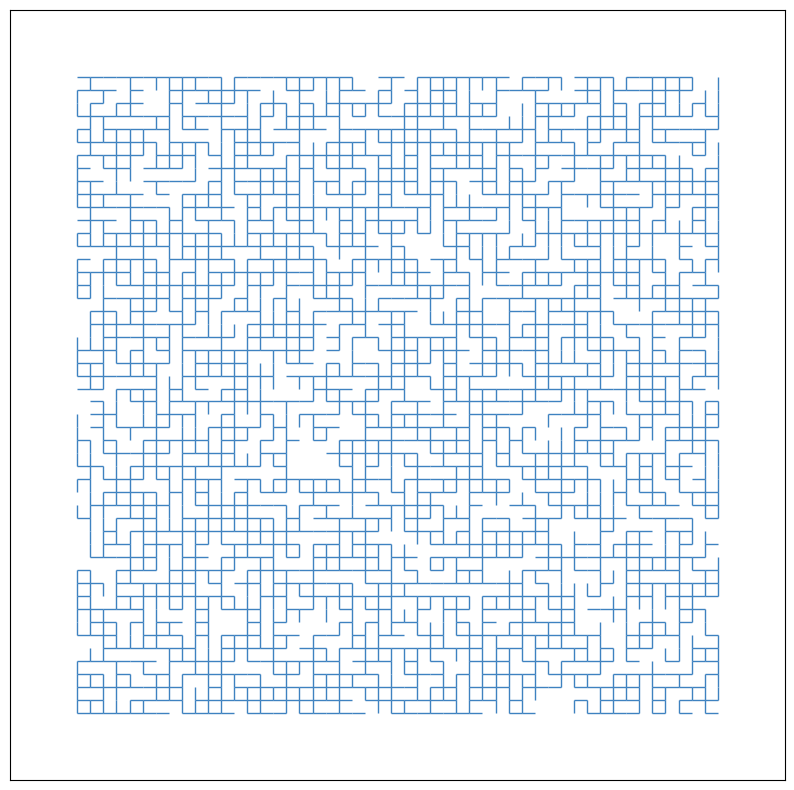

interactive(children=(FloatSlider(value=0.7, description='p', max=1.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.draw_graph(p)>

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from ipywidgets import interact, FloatSlider
from IPython.display import clear_output

# 100x100 격자 그래프 생성
width = 50
G = nx.grid_2d_graph(width, width)

# width * width 개의 색을 랜덤생성
colors = [(
    random.random(),
    random.random(),
    random.random()
) for _ in range(width * width)]


# 각 엣지에 랜덤 weight
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = random.random()

# 위치 고정
pos = {n: n for n in G.nodes()}



def draw_graph(p):
    clear_output(wait=True)
    plt.figure(figsize=(10, 10))

    # p 이하 엣지만 포함
    edges = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] < p]

    # 엣지만 있는 부분 그래프
    H = nx.Graph()
    H.add_edges_from(edges)

    # 연결 컴포넌트 추출
    components = list(nx.connected_components(H))

    # 최신 방식 컬러맵

    # 컴포넌트별 엣지 색상 적용
    for i, comp in enumerate(components):
        sub_edges = [(u, v) for (u, v) in H.edges() if u in comp]
        nx.draw_networkx_edges(
            H, pos,
            edgelist=sub_edges,
            width=1,
            edge_color=[colors[i]]
        )
        nx.draw_networkx_nodes(H, pos,node_size=1, node_color=[colors[i]] * len(comp), )


    # 노드 표시 (고정)
    

    plt.xticks([])
    plt.yticks([])
    plt.title(f"p = {p:.2f}")
    plt.show()


interact(
    draw_graph,
    p=FloatSlider(min=0, max=1, step=0.01, value=0.7)
)
